In [8]:
#import matplotlib.pyplot as plt
#import numpy as np
#import seaborn as sns
#import math
#from scipy import stats
#print("imported " + str(len(raw)) + " rows")
#raw.columns.tolist()

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from IPython.display import HTML, display
import tabulate
import numpy as np
from matplotlib import cm
raw = pd.pandas.read_csv('../setup_data/pred_1x1_20181206.csv',sep=",",low_memory=False)

## Functions

def print_list(list_in):
    display(HTML(tabulate.tabulate(list_in, tablefmt='html')))

# Setup Data Set

In [95]:
data = raw.copy()
data['published_week_dt'] = pd.to_datetime(raw['published_week'])


In [34]:
## calculate new variables
#def rolling_avg(df,rolling_interval,variable):    

intervals = ['7d','14d','28d']
data = data[data['published'] >'2018-03-01']
## MEAN SQM SOLD PRICE
for interval in intervals:
    # make copy of df and set new index
    tmp_df = data.copy()
    tmp_df['sold_dt'] = pd.to_datetime(tmp_df['sold_date'])
    tmp_df = tmp_df.set_index('sold_dt')
    
    # create series of the variable we want to do rolling over
    sold_price = tmp_df[['sqm_sold_price']]
    # calculate mean per week and calculate rooling for 'rolling_interval'
    rolling_var = sold_price.resample('W-MON').mean().sort_index().rolling(interval).mean()
    rolling_var.columns = ['mean_sold_sqm_price_'+interval]
    # Merge dataframes
    data = pd.merge(data, rolling_var, left_on = 'published_week_dt', right_index=True, how = 'left')

## DERIVATIVE MEAN SQM SOLD PRICE
#for interval in intervals:
    


85
43
49
54
52
85
44
49
54
52
            sqm_sold_price
sold_dt                   
2018-03-05              76
2018-03-12              43
2018-03-19              53
2018-03-26              51
2018-04-02              44
2018-04-09              23
2018-04-16              61
2018-04-23              80
2018-04-30              75
2018-05-07              43
2018-05-14              72
2018-05-21              58
2018-05-28              68
               deriv
sold_dt             
2018-03-05 -0.394737
2018-03-12 -0.767442
2018-03-19  0.188679
2018-03-26 -0.039216
2018-04-02 -0.159091
2018-04-09 -0.913043
2018-04-16  0.622951
2018-04-23  0.237500
2018-04-30 -0.066667
2018-05-07 -0.744186
2018-05-14  0.402778
2018-05-21 -0.241379
2018-05-28  0.147059


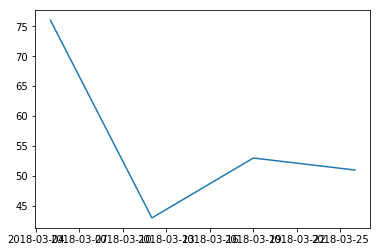

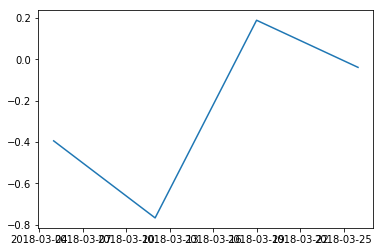

In [130]:
tmp_df = data.copy()
tmp_df['sold_dt'] = pd.to_datetime(tmp_df['sold_date'])
tmp_df = tmp_df.set_index('sold_dt')
# create series of the variable we want to do rolling over
print(tmp_df['2018-02-26':'2018-03-05']['sqm_sold_price'].count())
print(tmp_df['2018-03-05':'2018-03-11']['sqm_sold_price'].count())
print(tmp_df['2018-03-12':'2018-03-18']['sqm_sold_price'].count())
print(tmp_df['2018-03-19':'2018-03-25']['sqm_sold_price'].count())
print(tmp_df['2018-03-26':'2018-04-03']['sqm_sold_price'].count())

print(tmp_df['2018-02-25':'2018-03-03']['sqm_sold_price'].count())
print(tmp_df['2018-03-04':'2018-03-10']['sqm_sold_price'].count())
print(tmp_df['2018-03-12':'2018-03-18']['sqm_sold_price'].count())
print(tmp_df['2018-03-19':'2018-03-25']['sqm_sold_price'].count())
print(tmp_df['2018-03-26':'2018-04-03']['sqm_sold_price'].count())


# calculate mean per week and calculate rooling for 'rolling_interval'
sold_price_weekly = tmp_df[['sqm_sold_price']].resample('W-MON').count().sort_index()
#plt.plot(sold_price_weekly.diff()/sold_price_weekly)
deriv = sold_price_weekly.diff()/sold_price_weekly
deriv.columns = ['deriv']

#print(deriv[deriv['sold_dt'] < '2018-06-01'])
plt.plot((sold_price_weekly['2018-03-01':'2018-04-01']))
print(sold_price_weekly['2018-03-01':'2018-06-01'])
print(deriv['2018-03-01':'2018-06-01'])
plt.show()
plt.plot(deriv['2018-03-01':'2018-04-01'])

#plt.plot(sold_price_weekly)
plt.show()





sold_week
2018-03-05    80769.230800
2018-03-12    73898.851486
2018-03-19    70614.308034
2018-03-26    72105.613247
2018-04-02    77047.941212
2018-04-09    70672.124200
2018-04-16    73143.056236
2018-04-23    73253.005114
2018-04-30    67739.990529
2018-05-07    72414.906705
2018-05-14    72071.939384
2018-05-21    67399.942816
2018-05-28    69530.522529
Name: sqm_sold_price, dtype: float64
sold_week
2018-03-05   -0.160714
2018-03-12   -0.092970
2018-03-19   -0.046514
2018-03-26    0.020682
2018-04-02    0.064146
2018-04-09   -0.090217
2018-04-16    0.033782
2018-04-23    0.001501
2018-04-30   -0.081385
2018-05-07    0.064557
2018-05-14   -0.004759
2018-05-21   -0.069318
2018-05-28    0.030642
Name: sqm_sold_price, dtype: float64


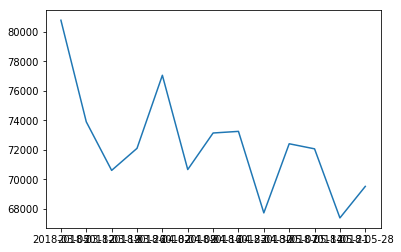

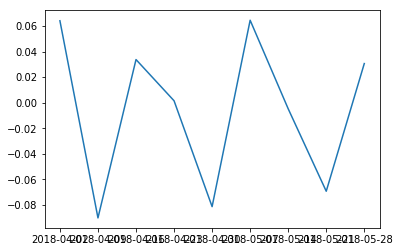

In [86]:
tmp_df = data.copy()
tmp_df['sold_dt'] = pd.to_datetime(tmp_df['sold_date'])
tmp_df = tmp_df.set_index('sold_dt')
# group the data and calculate the derivative
group_by = data_w_feature.groupby(['sold_week'])['sqm_sold_price'].mean()
deriv = group_by.diff()/group_by

#print(deriv[deriv['sold_dt'] < '2018-06-01'])
plt.plot((group_by['2018-03-01':'2018-06-01']))
print(group_by['2018-03-01':'2018-06-01'])
print(deriv['2018-03-01':'2018-06-01'])
plt.show()
plt.plot(deriv['2018-04-01':'2018-06-01'])
#plt.plot(sold_price_weekly)
plt.show()


In [23]:

#hej = data[data['published'] > '2018-01-01']
##pd.to_datetime(hej['sold_date'])
data_w_feature = rolling_avg(data[data['published'] >'2018-03-01'],'7d','sqm_sold_price')
data_w_feature = rolling_avg(data_w_feature,'14d','sqm_sold_price')
#data_w_feature = rolling_avg(data_w_feature,'21d','sqm_sold_price')
#data_w_feature = rolling_avg(data_w_feature,'100d','sqm_sold_price')

#print(data_w_feature[['published','sqm_sold_price_rolling_7d','sqm_list_price']].head(10))


print(data_w_feature.columns)
#plt.plot(data_w_feature.groupby(['published_week'])['sqm_sold_price_rolling_7d'].mean())
#plt.plot(data_w_feature.groupby(['published_week'])['sqm_sold_price_rolling_14d'].mean())
#plt.plot(data_w_feature.groupby(['published_week'])['sqm_sold_price_rolling_21d'].mean())
plt.plot(data_w_feature.groupby(['published_week'])['sqm_sold_price_rolling_7d'].mean())

plt.show()

,published,sold_date,object_type,living_area,rooms,floor,rent,list_price,sold_price,sold_price_source,...,sold_week,sold_month,sqm_list_price,sqm_sold_price,sqm_rent_price,area_from_geo,min_distance_to_metro,published_week_dt,sqm_sold_price_rolling_7d,sqm_sold_price_rolling_14d
3,2018-03-29,2018-04-13,Lagenhet,25.0,1.0,2.0,636.0,2495000.0,2725000,bid,...,2018-04-09,2018-04-01,99800.0000,109000.0000,25.4400,Östermalm,384.764962,2018-03-26,69684.803419,71791.827453
23,2018-04-28,2018-06-02,Lagenhet,96.0,4.0,3.0,4701.0,4495000.0,4500000,bid,...,2018-05-28,2018-06-01,46822.9167,46875.0000,48.9688,Järva,1544.807102,2018-04-23,72662.327015,72201.189693
62,2018-04-26,2018-05-09,Lagenhet,41.0,1.5,0.0,1660.0,2950000.0,3500000,bid,...,2018-05-07,2018-05-01,71951.2195,85365.8537,40.4878,Vasastan,649.603299,2018-04-23,72662.327015,72201.189693
68,2018-05-04,2018-08-31,Lagenhet,138.0,6.0,4.0,5679.0,8375000.0,8250000,bid,...,2018-08-27,2018-08-01,60688.4058,59782.6087,41.1522,Södermalm,87.029668,2018-04-30,72398.778322,72530.552668
73,2018-04-27,2018-05-10,Lagenhet,25.0,1.0,2.0,930.0,2495000.0,2965000,bid,...,2018-05-07,2018-05-01,99800.0000,118600.0000,37.2000,Vasastan,446.141721,2018-04-23,72662.327015,72201.189693


In [18]:
#[str(x) for x in raw["published"]]
#data['2018-01-01':'2018-12-30'].resample('W').count().sort_index()
plt.plot(data['2018-01-01':'2018-06-30'].resample('W').mean().sort_index().rolling('28d').mean())
plt.plot(data['2018-01-01':'2018-06-30'].resample('W').mean())
plt.show()

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.range.RangeIndex'> with these indexers [2018-01-01] of <class 'str'>

In [21]:
#print(hej1)
#new_df = pd.merge(data, num_sold_14d, left_on = 'published_week_dt', right_index=True, how = 'left')
#print(new_df[['published','num_sold_14d']].head())
print(data[['published','num_sold_14d']].head())

KeyError: "['num_sold_14d'] not in index"

In [19]:
print(data['2018-01-01':'2018-06-30'].resample('W').count().sort_index().head(10))
print(data['2018-01-01':'2018-06-30'].resample('W').count().sort_index().rolling('14d').sum().head(10))

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.range.RangeIndex'> with these indexers [2018-01-01] of <class 'str'>

In [20]:
a = raw_2[raw_2['published'] > '2018-04-01'][['sold_date','published','published_dt','published_week']]
b = data['2018-04-01':'2018-06-01'].resample('W-MON').count().sort_index().rolling('14d').sum()
b.columns = ['sum_sold_2w']
print(a.head())
print(b)
print(len(a))
print(len(b))
#left_index=True, right_on='Project'
#new_df = pd.merge(a,b,  how='left', left_index=True ,right_on='sum_sold_2w')
new_df = pd.merge(a, b, left_on = 'published_dt', right_index=True, how = 'left')
print(len(new_df))
print(new_df)

NameError: name 'raw_2' is not defined

In [3]:
### CLEAN DATA FUNC

def clean_func(data,predictors):
    
    ## DO IMPUTATION 
    # living_area
    floor = Imputer(missing_values="NaN", strategy="mean")
    floor.fit(data[["floor"]])
    data['floor'] = floor.transform(data[["floor"]]).ravel()
    
    ## REMOVE ROWS w. NULL
    data = data[pd.notnull(data[predictors]).all(axis=1)]
    return data


In [4]:
## set predictors
predictors = ['min_distance_to_metro','living_area'
              ,'floor','sqm_list_price','sqm_rent_price'
              ,'area_from_geo']

## set numeric predictors
num_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64','uint8']
train_data_numerics = raw[predictors].select_dtypes(include=num_types).columns

In [5]:
## Set target and clean data (se function above)
target = 'sqm_sold_price'
train_data = clean_func(raw,predictors)

train_data_predictors = train_data[predictors]
train_data_target = train_data[target].values